# BERT-LDA Review Insights

**This project aims to analyze user reviews of ChatGPT using advanced natural language processing techniques. We employ BERT for sentiment analysis to understand user sentiments accurately and use LDA for topic modeling to uncover prevalent themes in the feedback.**

To dive into the ChatGPT reviews, we turned to BERT for sentiment analysis because it’s exceptionally good at understanding the nuances in language. Unlike simpler methods that might miss the subtleties of how people express their feelings, BERT can grasp the context and meaning behind user comments more accurately. This means we get a clearer picture of whether users are genuinely happy, neutral, or unhappy with their experience. By using BERT, we can better categorize the sentiments in the reviews, which helps us pinpoint areas where we’re doing well and where we need to improve.

After analyzing sentiments with BERT, we used Latent Dirichlet Allocation (LDA) to dig deeper into what users are talking about. LDA helps us uncover the main topics or themes in the reviews, giving us a clearer view of what people are focusing on, whether it’s specific features or common issues. By combining the sentiment scores with the insights from LDA, we can better understand not just how people feel, but also what’s driving those feelings. This approach lets us make more informed decisions and improvements, ensuring we address the right areas to enhance user satisfaction.

In [1]:
import numpy as np 
import pandas as pd
import os
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/chatgpt-reviews-daily-updated/chatgpt_reviews.csv


In [3]:
data = pd.read_csv('/kaggle/input/chatgpt-reviews-daily-updated/chatgpt_reviews.csv')

In [4]:
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,b31ad0fb-4e09-422c-bee6-95b1687297fc,Sana Irshad,It's one of the best apps I love it and the be...,5,0,1.2024.219,2024-08-17 19:25:22,1.2024.219
1,e839f9c8-90fa-44f5-ba78-d02ad7fa46f2,Biswajit Shil,good,5,0,1.2024.206,2024-08-17 19:19:56,1.2024.206
2,79637a22-a090-49d7-899d-3d1ebb05b698,Narsinh Gamit,best for learning,5,0,1.2024.198,2024-08-17 19:15:28,1.2024.198
3,60d7ff5c-be6b-46ae-83ab-bd34d552fad7,Jacquerine Songolo,fast and excellent,5,0,1.2024.219,2024-08-17 19:15:22,1.2024.219
4,ab324f83-c36d-4d52-8464-dc9ff51244b5,Kabiru Musa Yusuf,it's such a great development. I use chatgpt f...,5,0,1.2024.212,2024-08-17 19:14:23,1.2024.212


In [5]:
data.dtypes

reviewId                object
userName                object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
appVersion              object
dtype: object

In [6]:
data.isnull().sum()

reviewId                    0
userName                    1
content                     6
score                       0
thumbsUpCount               0
reviewCreatedVersion    14502
at                          0
appVersion              14502
dtype: int64

In [7]:
data['reviewCreatedVersion'].fillna('Unknown', inplace=True)
data['appVersion'].fillna('Unknown', inplace=True)
data['userName'].fillna('Unknown', inplace=True)
data['content'].fillna('No review provided', inplace=True)

/tmp/ipykernel_24/3436829203.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reviewCreatedVersion'].fillna('Unknown', inplace=True)
/tmp/ipykernel_24/3436829203.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [8]:
data.isnull().sum()

reviewId                0
userName                0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
appVersion              0
dtype: int64

In [9]:
df = data[['content']]

In [10]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
stop_words = set(stopwords.words('english'))

In [12]:
def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces and newlines
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text) # Tokenization
    tokens = [word for word in tokens if word not in stop_words] # Remove stop words
    return ' '.join(tokens) # Join tokens back into a single string

In [13]:
df['content'] = df['content'].apply(preprocess_text)

/tmp/ipykernel_24/220339540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(preprocess_text)


In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [15]:
stopwords = set(STOPWORDS)
stopwords.update(['chatgpt', 'app', 'apps', 'gpt', 'review', 'reviews', 'ChatGPT'])

In [16]:
print(df['content'].apply(len).describe()) 

count    190591.000000
mean         31.617201
std          50.634338
min           0.000000
25%           7.000000
50%          13.000000
75%          34.000000
max         500.000000
Name: content, dtype: float64


In [17]:
print(f"Number of reviews: {df.shape[0]}")

Number of reviews: 190591


In [18]:
df['review_length'] = df['content'].apply(len)
print(f"Average review length: {df['review_length'].mean()}")

Average review length: 31.617201231957438


/tmp/ipykernel_24/494514692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_length'] = df['content'].apply(len)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


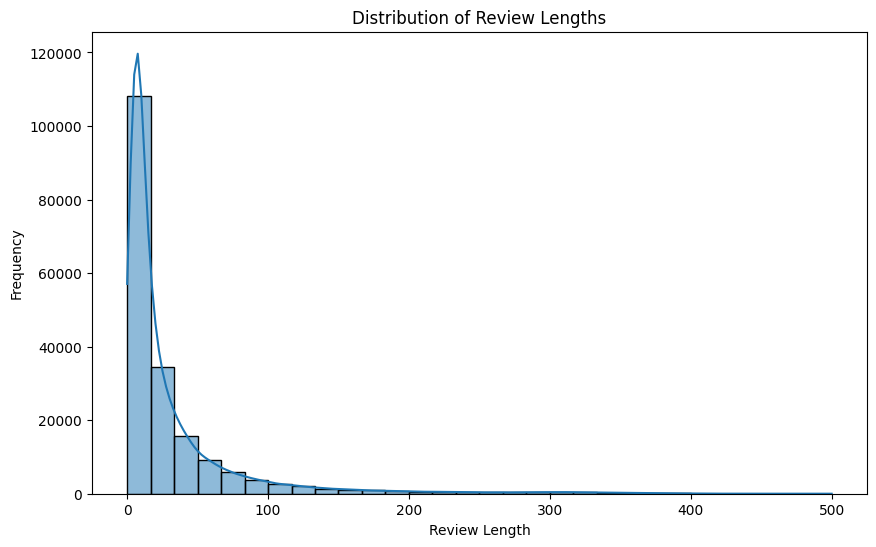

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


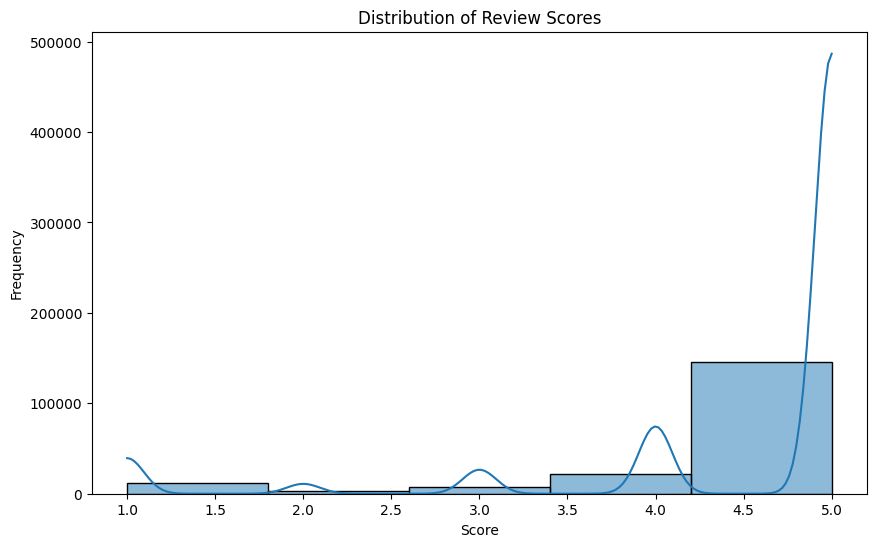

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data['score'], bins=5, kde=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [21]:
text = ' '.join(df['content'])
#wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=stopwords).generate(text)

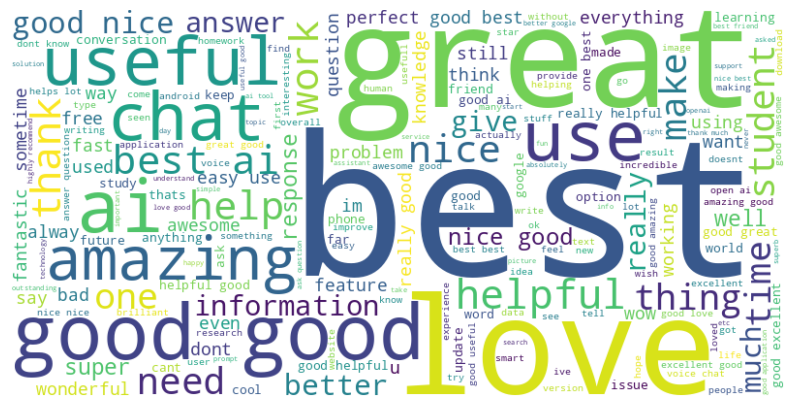

In [22]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# BERT Sentiment Analysis

In [23]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
import torch

2024-08-19 10:23:46.570766: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 10:23:46.570874: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 10:23:46.693300: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [24]:
nlp = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english', device =0)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [25]:
df['sentiment'] = df['content'].apply(lambda x: nlp(x)[0]['label'])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
/tmp/ipykernel_24/171870796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['content'].apply(lambda x: nlp(x)[0]['label'])


In [26]:
df.head()

,content,review_length,sentiment
0,one best apps love best part free,33,POSITIVE
1,good,4,POSITIVE
2,best learning,13,POSITIVE
3,fast excellent,14,POSITIVE
4,great development use chatgpt frequently love,45,POSITIVE


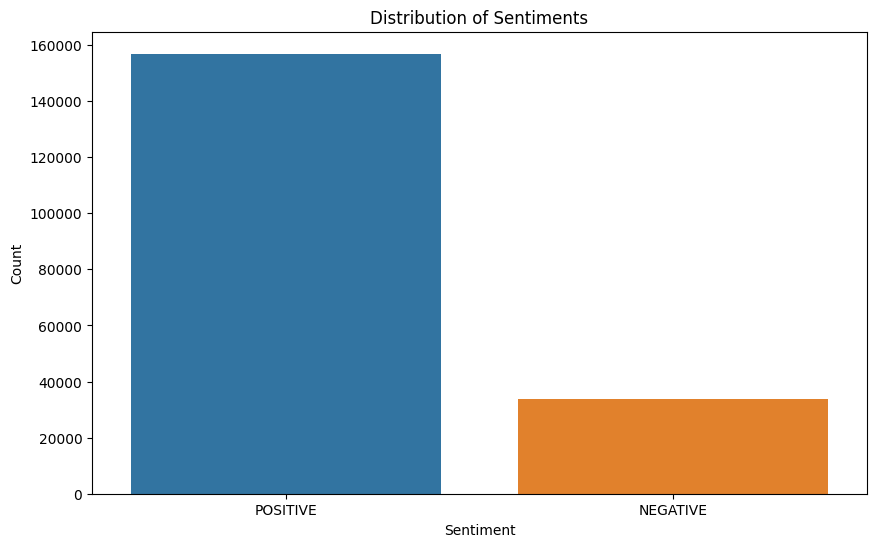

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [28]:
print(df[['content', 'sentiment']].sample(10))

                                                  content sentiment
107104                             really helps alot free  POSITIVE
153845                                                     POSITIVE
178501                                     excellent work  POSITIVE
143481                                              happy  POSITIVE
8118                                                       POSITIVE
44266                                                good  POSITIVE
87259                    perfect app explore things ideas  POSITIVE
96051         good cant send image doesnt generate images  NEGATIVE
36406   amazing app ever seen little complain updated ...  NEGATIVE
106584                                        useful like  POSITIVE


In [29]:
# Get predictions with confidence scores
df['sentiment_with_scores'] = df['content'].apply(lambda x: nlp(x))

# Example of accessing the score
df['sentiment_score'] = df['sentiment_with_scores'].apply(lambda x: x[0]['score'])

# Display a few examples
print(df[['content', 'sentiment', 'sentiment_score']].sample(10))

                                                  content sentiment  \
28873                     cant open app loading dont know  NEGATIVE   
126263                               great quick easy use  POSITIVE   
100577                                       best student  POSITIVE   
92672   app useful ask question answers good detail th...  POSITIVE   
22171                                                      POSITIVE   
98034                               words app helped alot  POSITIVE   
131346                                               good  POSITIVE   
134620                                       usefuli love  POSITIVE   
99764                      amazing experience application  POSITIVE   
2266                                  show chatbot better  NEGATIVE   

        sentiment_score  
28873          0.994041  
126263         0.999501  
100577         0.999834  
92672          0.997110  
22171          0.748121  
98034          0.968832  
131346         0.999816  
134620    

/tmp/ipykernel_24/1156898113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_with_scores'] = df['content'].apply(lambda x: nlp(x))
/tmp/ipykernel_24/1156898113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_score'] = df['sentiment_with_scores'].apply(lambda x: x[0]['score'])


In [30]:
unique_labels = df['sentiment'].unique()
print(unique_labels)

['POSITIVE' 'NEGATIVE']


In [31]:
df.loc[:, 'datetime'] = data['at']

/tmp/ipykernel_24/1087858222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'datetime'] = data['at']


In [32]:
df.head()

,content,review_length,sentiment,sentiment_with_scores,sentiment_score,datetime
0,one best apps love best part free,33,POSITIVE,"[{'label': 'POSITIVE', 'score': 0.999428927898...",0.999429,2024-08-17 19:25:22
1,good,4,POSITIVE,"[{'label': 'POSITIVE', 'score': 0.999816119670...",0.999816,2024-08-17 19:19:56
2,best learning,13,POSITIVE,"[{'label': 'POSITIVE', 'score': 0.999823629856...",0.999824,2024-08-17 19:15:28
3,fast excellent,14,POSITIVE,"[{'label': 'POSITIVE', 'score': 0.999868869781...",0.999869,2024-08-17 19:15:22
4,great development use chatgpt frequently love,45,POSITIVE,"[{'label': 'POSITIVE', 'score': 0.996484041213...",0.996484,2024-08-17 19:14:23


In [33]:
df['datetime'] = pd.to_datetime(df['datetime']) 
df.set_index('datetime', inplace=True)

/tmp/ipykernel_24/2428973335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['datetime'])


/tmp/ipykernel_24/1671702622.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = df.resample('M')['sentiment_score'].mean()


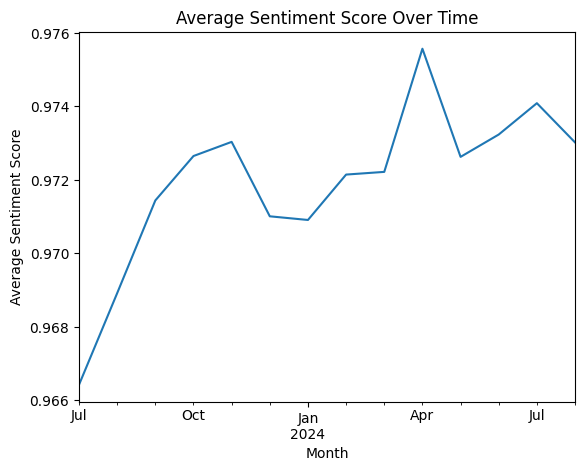

In [34]:
monthly_sentiment = df.resample('M')['sentiment_score'].mean()
monthly_sentiment.plot(kind='line')
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.show()

# LDA (Latent Dirichlet Allocation) 

**Topic Modeling: Use techniques like LDA (Latent Dirichlet Allocation) to identify topics within positive and negative reviews.**

1. Apply LDA: Extract topics from reviews.
2. Understand Topics: Identify key terms for each topic.
3. Combine with Sentiment: Analyze sentiment scores by topic.
4. Generate Insights: Provide actionable recommendations based on the analysis.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [36]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['content'])
lda = LatentDirichletAllocation(n_components=5)
lda.fit(X)

LatentDirichletAllocation(n_components=5)

In [37]:
topic_distribution = lda.transform(X)

In [38]:
df['topic'] = np.argmax(topic_distribution, axis=1)

/tmp/ipykernel_24/2918151477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topic'] = np.argmax(topic_distribution, axis=1)


In [39]:
df.head()

,content,review_length,sentiment,sentiment_with_scores,sentiment_score,topic
datetime,,,,,,
2024-08-17 19:25:22,one best apps love best part free,33,POSITIVE,"[{'label': 'POSITIVE', 'score': 0.999428927898...",0.999429,1
2024-08-17 19:19:56,good,4,POSITIVE,"[{'label': 'POSITIVE', 'score': 0.999816119670...",0.999816,3
2024-08-17 19:15:28,best learning,13,POSITIVE,"[{'label': 'POSITIVE', 'score': 0.999823629856...",0.999824,2
2024-08-17 19:15:22,fast excellent,14,POSITIVE,"[{'label': 'POSITIVE', 'score': 0.999868869781...",0.999869,1
2024-08-17 19:14:23,great development use chatgpt frequently love,45,POSITIVE,"[{'label': 'POSITIVE', 'score': 0.996484041213...",0.996484,1


In [40]:
n_words = 10
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-n_words:]]
    print(f"Topic {topic_idx}: {' '.join(top_words)}")

Topic 0: service thats life beautiful works incredible app superb perfect amazing
Topic 1: ai like fantastic answers information better answer chatgpt app excellent
Topic 2: experience help helps use really ai app great helpful best
Topic 3: application really thank ai ok cool wow app nice good
Topic 4: helping helpfull outstanding wonderful like app super awesome useful love


In [41]:
topic_sentiment = df.groupby('topic')['sentiment_score'].mean().reset_index()
print(topic_sentiment)

   topic  sentiment_score
0      0         0.926591
1      1         0.966390
2      2         0.984410
3      3         0.991364
4      4         0.976287


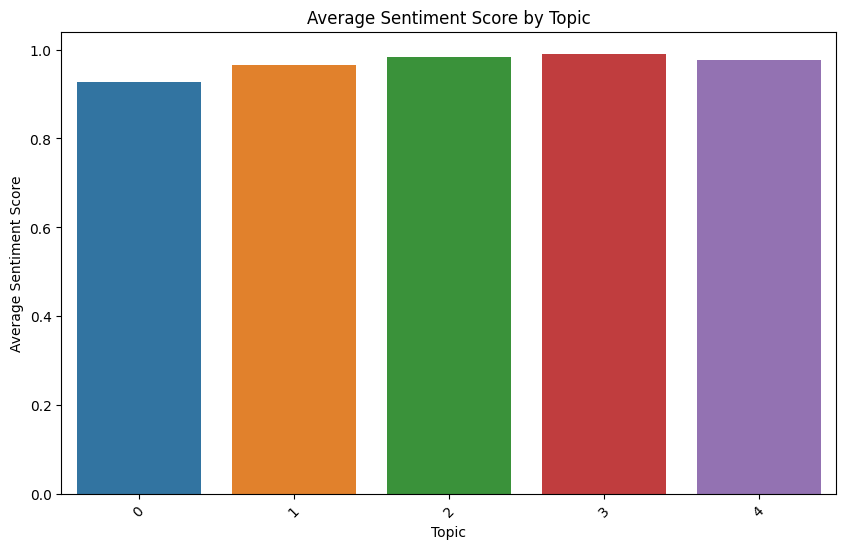

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='topic', y='sentiment_score', data=topic_sentiment)
plt.title('Average Sentiment Score by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()

Overall Positive Sentiment: All topics have high average sentiment scores, indicating that users generally have positive feelings across the different topics. The sentiment scores are close to 1, suggesting a high level of satisfaction.

Best Performing Topics: Topic 3 has the highest average sentiment score (0.992), which means that reviews associated with this topic are perceived the most positively. This could indicate that this topic is associated with features or aspects that users particularly enjoy.

Consistent Satisfaction: Topics 0, 1, 2, and 4 also have high sentiment scores, though slightly lower than Topic 3. This consistency in positive sentiment suggests that there are no major issues across the different topics.